In [ ]:
#The following Python code analyzes an HR employee attrition dataset.

#The dataset can be found at the following link: https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction

#The following analysis focuses on finding which factors have the strongest influence on employee attrition and 
#answers questions about employee attrition within the company.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [3]:
# Read in the data

df = pd.read_csv(r'C:\Users\alyss\Downloads\HR_Employee_Attrition.csv')

In [4]:
# View the first 5 rows of data

df.head()

,Age,Attrition,Business_Travel,Department,Distance_From_Home,Education,Education_Field,Employee_Number,Environment_Satisfaction,Gender,...,Relationship_Satisfaction,Standard_Hours,Stock_Option_Level,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager
0,41,True,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,False,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,True,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,False,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,False,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# View data types

df.dtypes

Age                            int64
Attrition                       bool
Business_Travel               object
Department                    object
Distance_From_Home             int64
Education                      int64
Education_Field               object
Employee_Number                int64
Environment_Satisfaction       int64
Gender                        object
Job_Involvement                int64
Job_Level                      int64
Job_Role                      object
Job_Satisfaction               int64
Marital_Status                object
Monthly_Income                 int64
Num_Companies_Worked           int64
Over_18                         bool
Over_Time                       bool
Percent_Salary_Hike            int64
Performance_Rating             int64
Relationship_Satisfaction      int64
Standard_Hours                 int64
Stock_Option_Level             int64
Total_Working_Years            int64
Training_Times_Last_Year       int64
Work_Life_Balance              int64
Y

In [6]:
# All data types are correct.
# Data was pre-cleaned in Microsoft Excel. Moving on to analytics.

C:\Users\alyss\AppData\Local\Temp\ipykernel_24644\405377564.py:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop('Attrition', axis=1).corrwith(df['Attrition'])


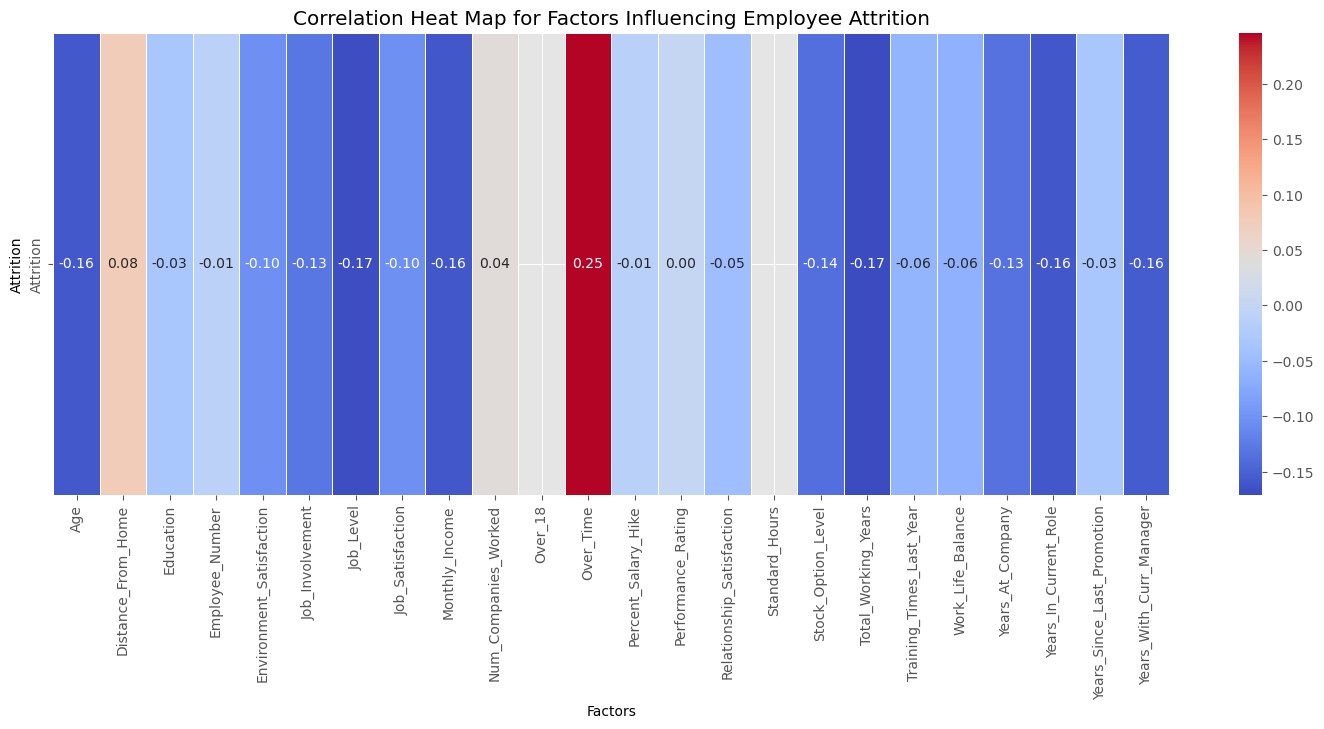

In [7]:
# Create a heat map that explores how different factors influence employee attrition

plt.figure(figsize=(18,6))

#Extract correlation values for attrition
correlation_matrix = df.drop('Attrition', axis=1).corrwith(df['Attrition'])

#create a dataframe with attrition correlation values
correlation_df = pd.DataFrame(correlation_matrix, columns=['Attrition'])

#Crate a heatmap for attrition
sns.heatmap(correlation_df.transpose(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

#Add visualization labels
plt.title('Correlation Heat Map for Factors Influencing Employee Attrition')
plt.xlabel('Factors')
plt.ylabel('Attrition')

plt.show()

In [8]:
#Values with strongest positive correlation (.25): Overtime

#Values with strongest negative correlation (-.17): total working years, job level.

#Other factors that have a strong negative correlation (-.16): years with current manager, years in current role, 
#monthly income, and age

In [9]:
# Create visualizations to further explore factors of high negative or positive correlation.

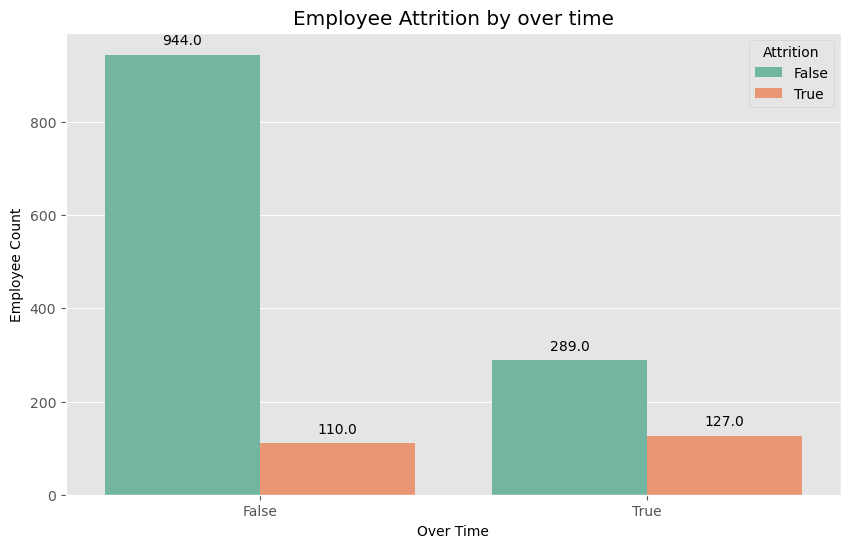

In [10]:
#Create a chart displaying the correlation between over time and attrition

#Plot the chart
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Over_Time', hue='Attrition', data=df, palette='Set2')

#Add chart title and axis-labels
plt.title('Employee Attrition by over time')
plt.xlabel('Over Time')
plt.ylabel('Employee Count')

#Add labels with the employee count to each bar in the chart.
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

In [17]:
#Employees who worked over time were more likely to leave the company.
#While a similar number of employees left from both overtime groups, a higher percentage of employees who worked overtime left.

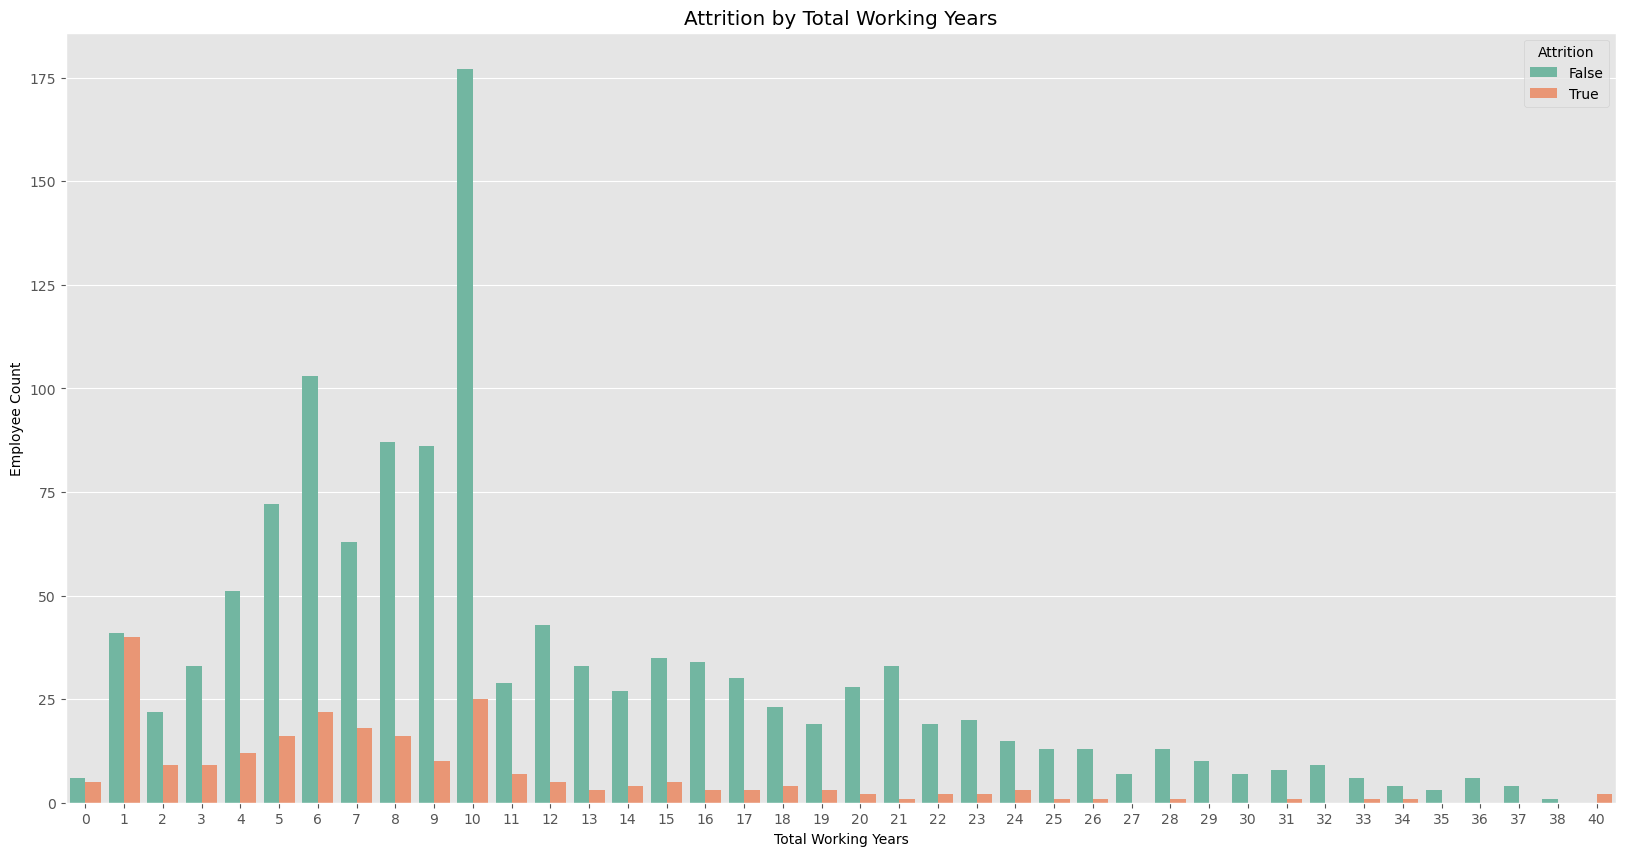

In [12]:
#Create a chart displaying the correlation between total working years and attrition

#Plot the chart
plt.figure(figsize=(20,10))
sns.countplot(x='Total_Working_Years', hue='Attrition', data=df, palette='Set2')

#Add chart title & axis-labels
plt.title('Attrition by Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Employee Count')

plt.show()

In [13]:
#The fewer years an employee has been in the workforce, the more likely they are to leave the company.
#The number of employees leaving remains low from years 11 to 38.
#Once an employee has been in the workforce for 40 years, they are more likely to leave again.
#Employees who have been in the workforce for 0 to 1 year are the most likely to leave the company.

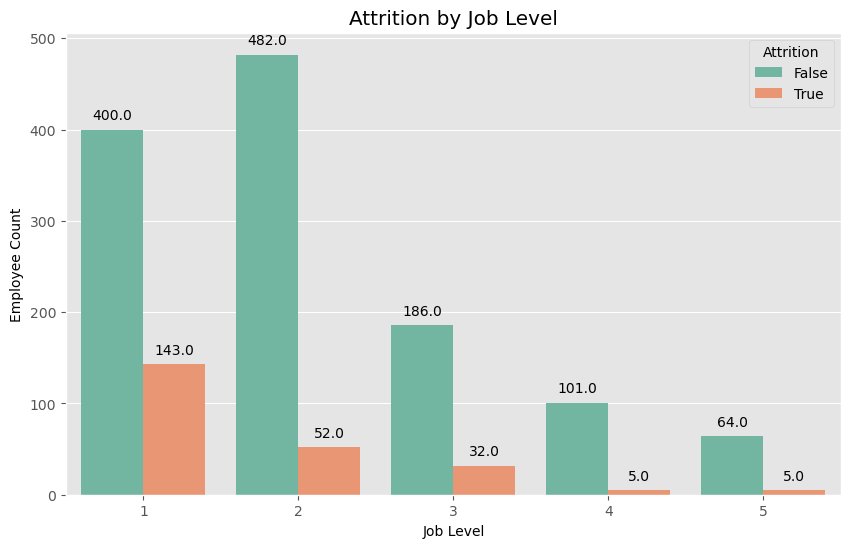

In [18]:
#Create a chart displaying the correlation between job level and attrition

#Plot the chart
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Job_Level', hue='Attrition', data=df, palette='Set2')

#Add chart title & axis-labels
plt.title('Attrition by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Employee Count')

#Add labels with the employee count to each bar in the chart.
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [19]:
#Employees with a lower job level are more likely to leave the company.
#Level 1 employees are the most likely to leave and level 4  and 5 are the leaset likely to leave.

In [20]:
#Looking into other factors with high negative correlation.

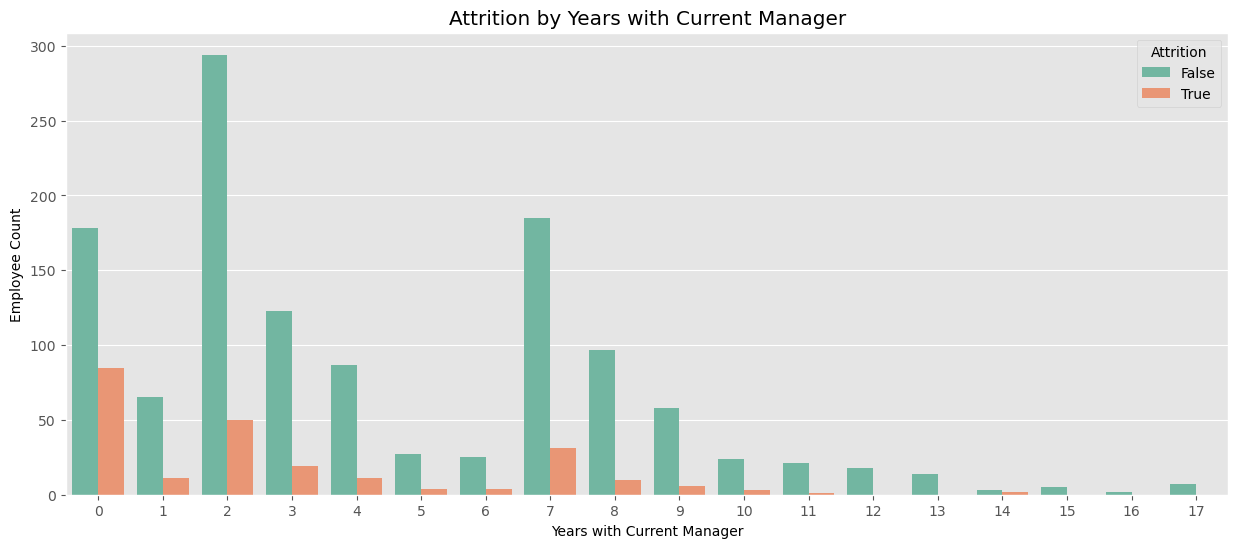

In [23]:
#Create a chart displaying the correlation between years with current manager and attrition

#Plot the chart
plt.figure(figsize=(15,6))
sns.countplot(x='Years_With_Curr_Manager', hue='Attrition', data=df, palette='Set2')

#Add chart title & axis-labels
plt.title('Attrition by Years with Current Manager')
plt.xlabel('Years with Current Manager')
plt.ylabel('Employee Count')

plt.show()

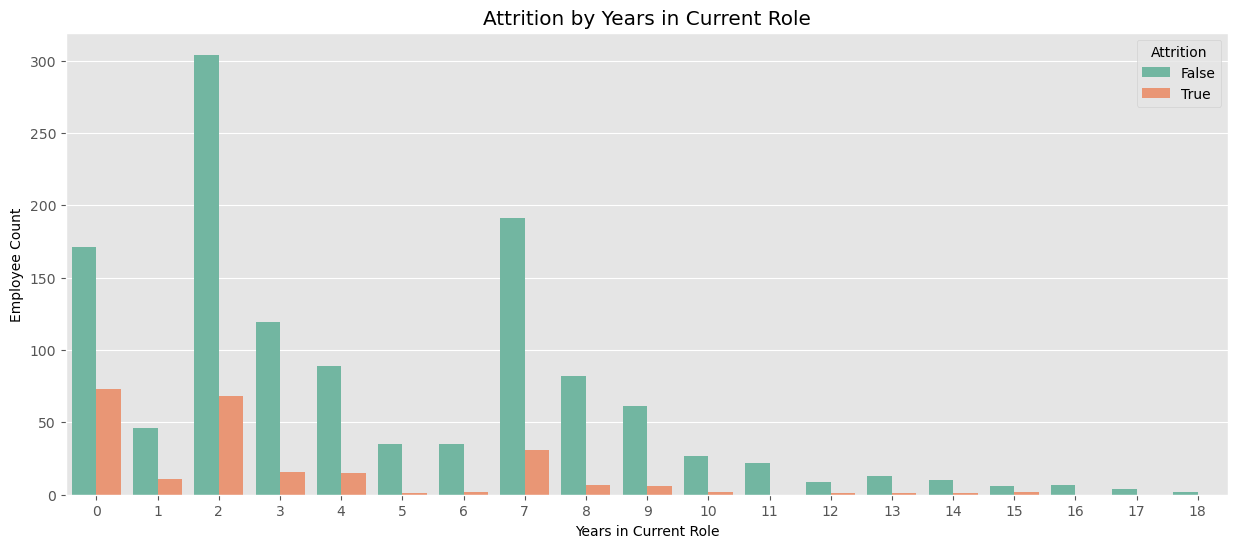

In [24]:
#Create a chart displaying the correlation between years in current role and attrition

#Plot the chart
plt.figure(figsize=(15,6))
sns.countplot(x='Years_In_Current_Role', hue='Attrition', data=df, palette='Set2')

#Add chart title & axis-labels
plt.title('Attrition by Years in Current Role')
plt.xlabel('Years in Current Role')
plt.ylabel('Employee Count')

plt.show()

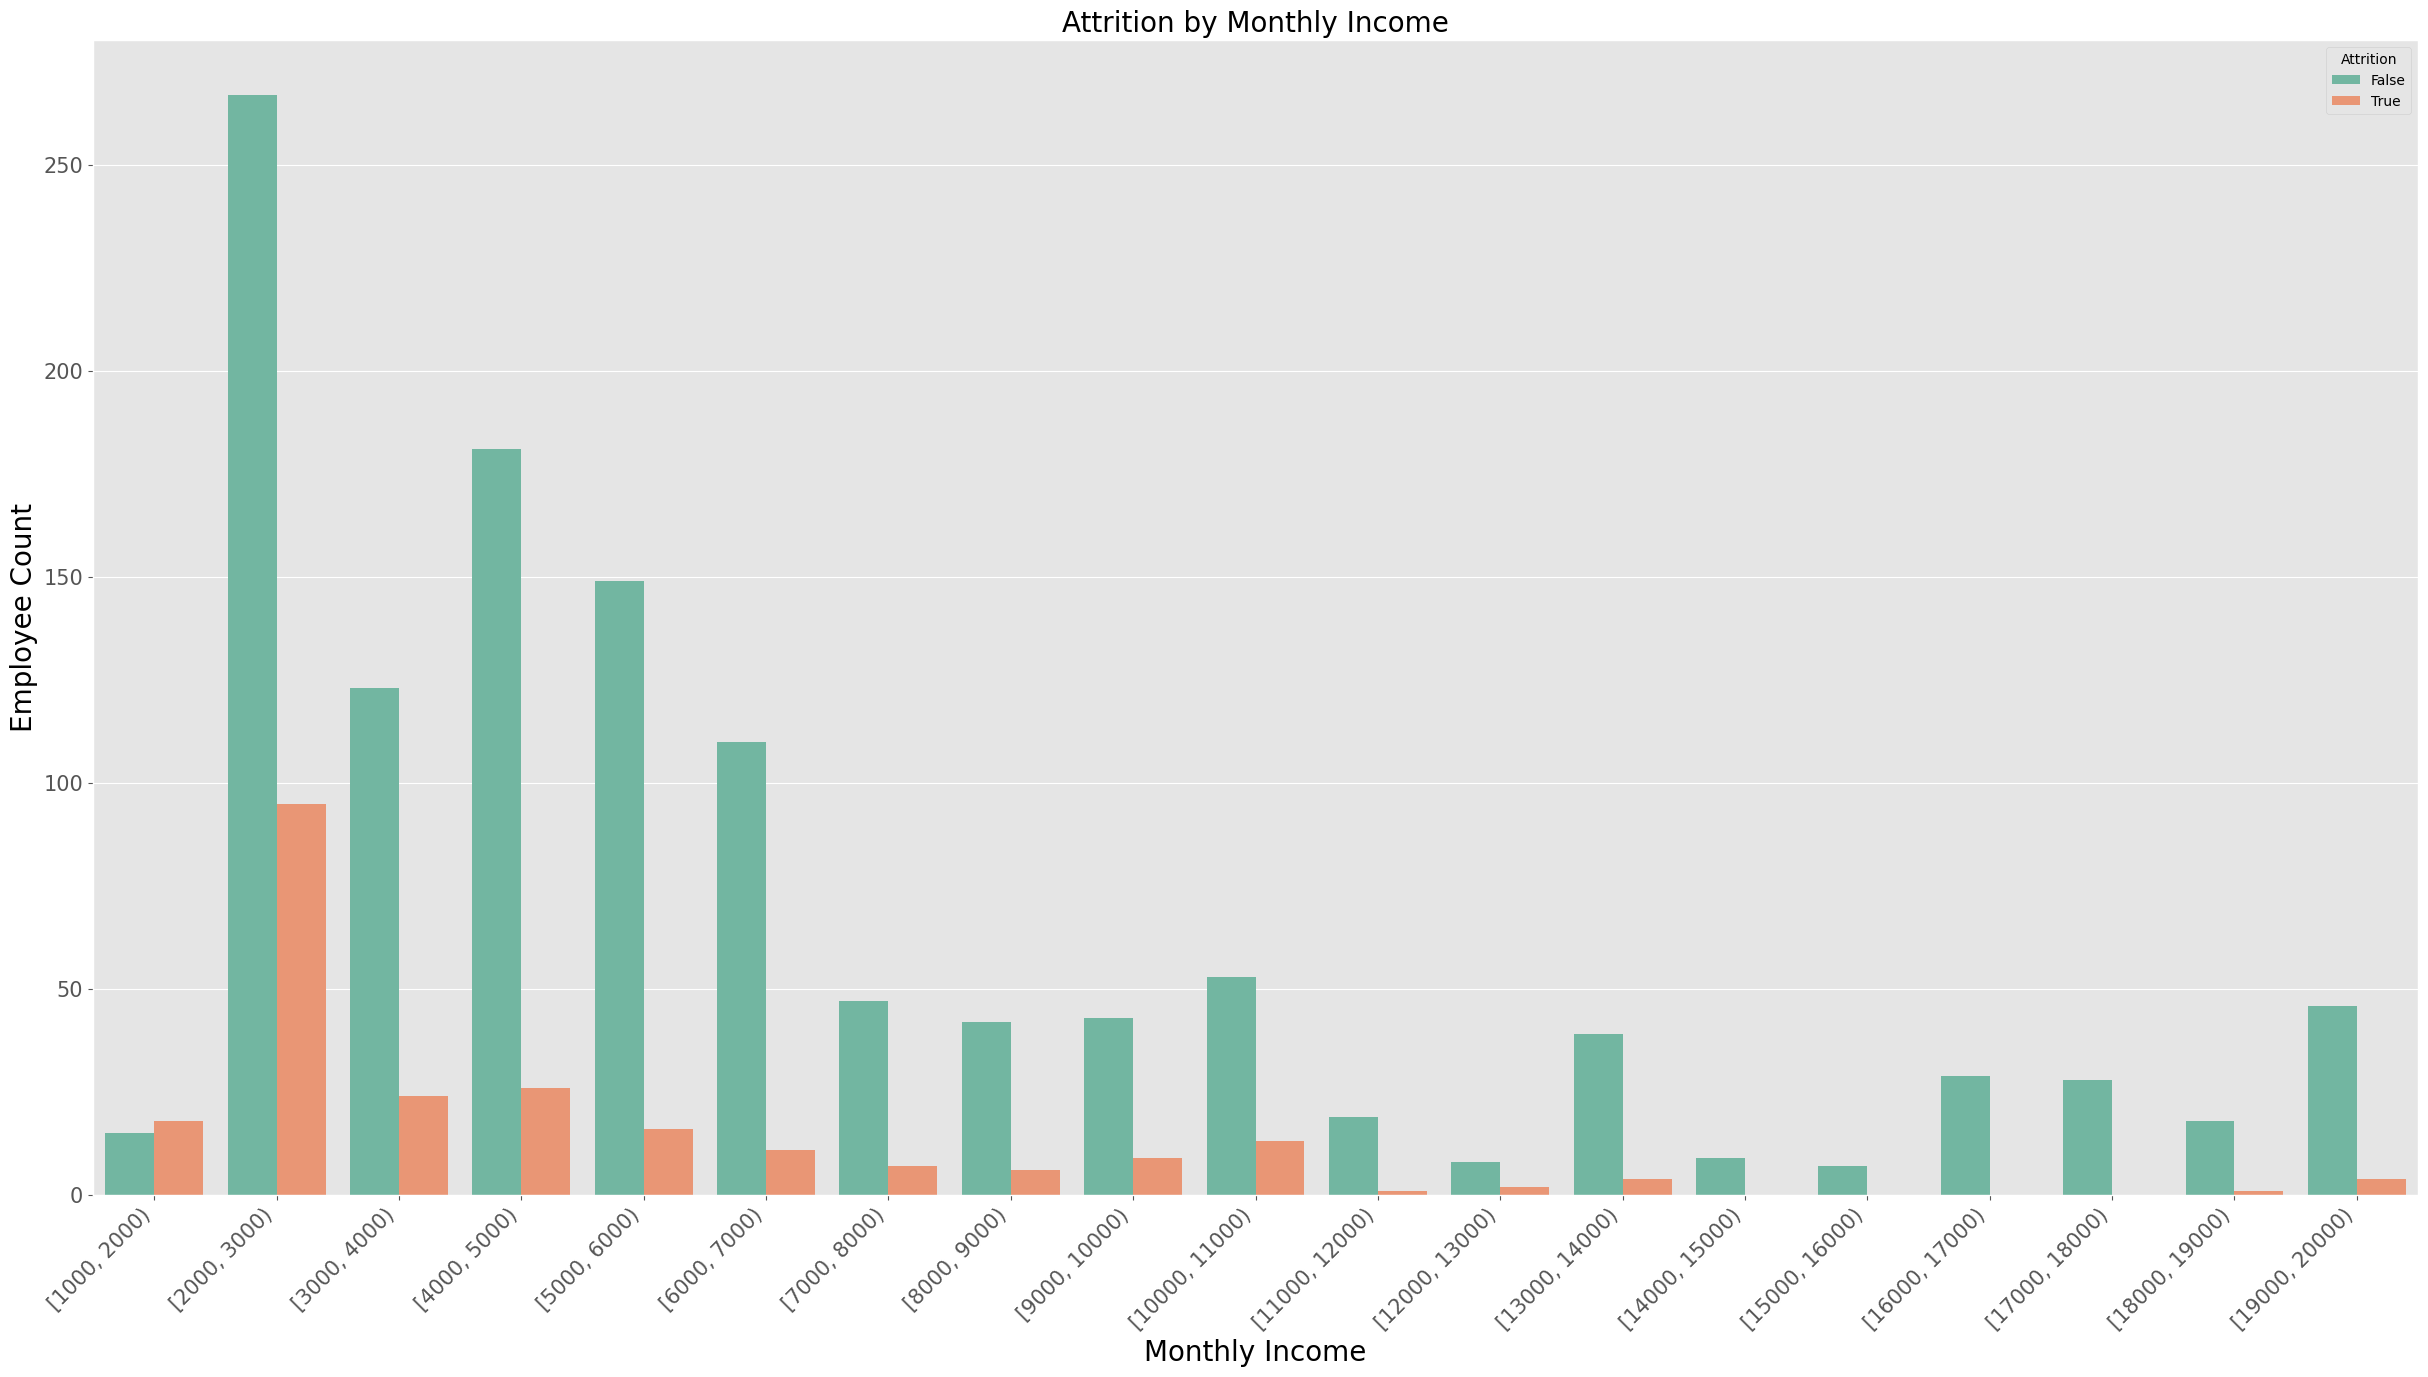

In [35]:
#Create a chart displaying attrition by monthly income

#Create bins for monthly income
bins = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]

#Use pd.cut to bin the monthly income data
df['Monthly_Income_Bin'] = pd.cut(df['Monthly_Income'], bins=bins, right=False)

#Plot the chart
plt.figure(figsize=(30,15))
sns.countplot(x='Monthly_Income_Bin', hue='Attrition', data=df, palette='Set2')

#Add chart title & axis-labels
plt.title('Attrition by Monthly Income', fontsize=20)
plt.xlabel('Monthly Income', fontsize=20)
plt.ylabel('Employee Count', fontsize=20)

#Rotate x-axis labels to improve readability
plt.xticks(rotation=45, ha='right')

#Increase label font size to improve readability
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.show()

In [36]:
#Employees who earn a lower monthly income leave the company at a higher rate.
#Employees making between $1,000 and $2,000 per month are the only group to leave at a higher rate than they stay.

In [37]:
#Answering additional questions about employee data

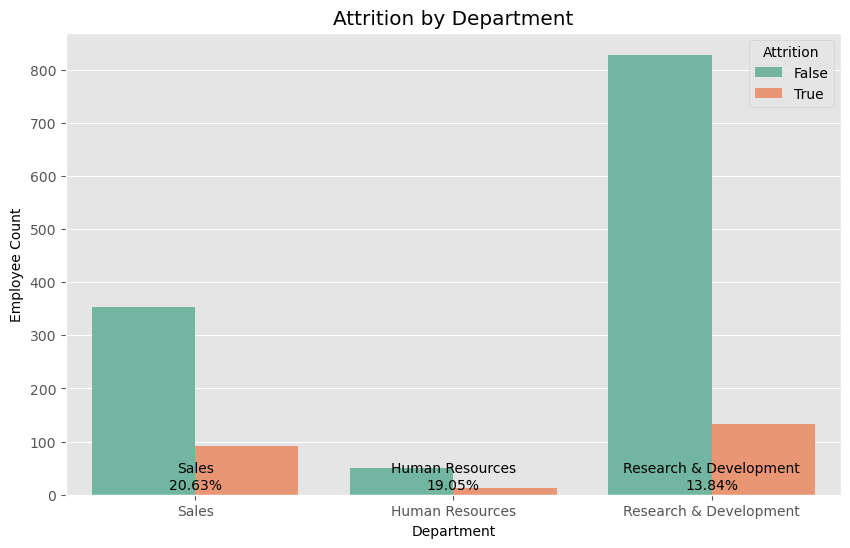

In [47]:
#Which departments have the highest precentage rate of employee attrition?

#Calculate the percentage of attrition for each department
attrition_percentage = (df[df['Attrition'] == True]['Department'].value_counts() / df['Department'].value_counts()) * 100

#Order the departments by highest attrition percentage
order = attrition_percentage.sort_values(ascending=False).index

#Plot the chart
plt.figure(figsize=(10,6))
sns.countplot(x='Department', hue='Attrition', data=df, palette='Set2', order=order)

#Add chart title & axis-labels
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Employee Count')

#Add labels declaring the attrition percentage for each department
for i, department in enumerate(order):
    plt.text(i, 5, f'{department}\n{attrition_percentage[department]:.2f}%', ha='center', va='bottom')

plt.show()

In [48]:
#Sales has the highest percentage of employees leave the company
#Research and development has the highest number of employees leave, but the lowest percentage of attrition.

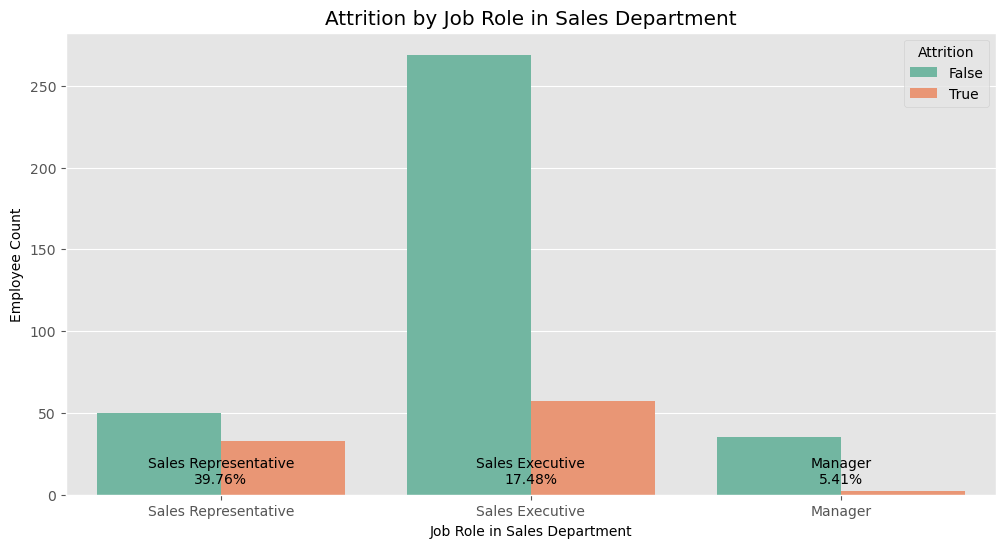

In [52]:
#Which positions within the sales department have the highest percentage of attrition?

#Filter data
sales_data = df[df['Department'] =='Sales']

#Calculate the attrition percent for each job role
attrition_percent = (sales_data[sales_data['Attrition'] == True]['Job_Role'].value_counts() / sales_data['Job_Role'].value_counts()) *100

#Sort job roles based on attrition percent
order = attrition_percent.sort_values(ascending=False).index

#Plot the chart
plt.figure(figsize=(12,6))
sns.countplot(x='Job_Role', hue='Attrition', data=sales_data, order=order, palette='Set2')

#Add chart title & axis-labels
plt.title('Attrition by Job Role in Sales Department')
plt.xlabel('Job Role in Sales Department')
plt.ylabel('Employee Count')

#Add labels declaring the attrition percentage for each department
for i, Job_Role in enumerate(order):
    plt.text(i, 5, f'{Job_Role}\n{attrition_percent[Job_Role]:.2f}%', ha='center', va='bottom')
    
plt.show()

In [53]:
#Within the sales department, sales representatives have the highest percentage of attrition

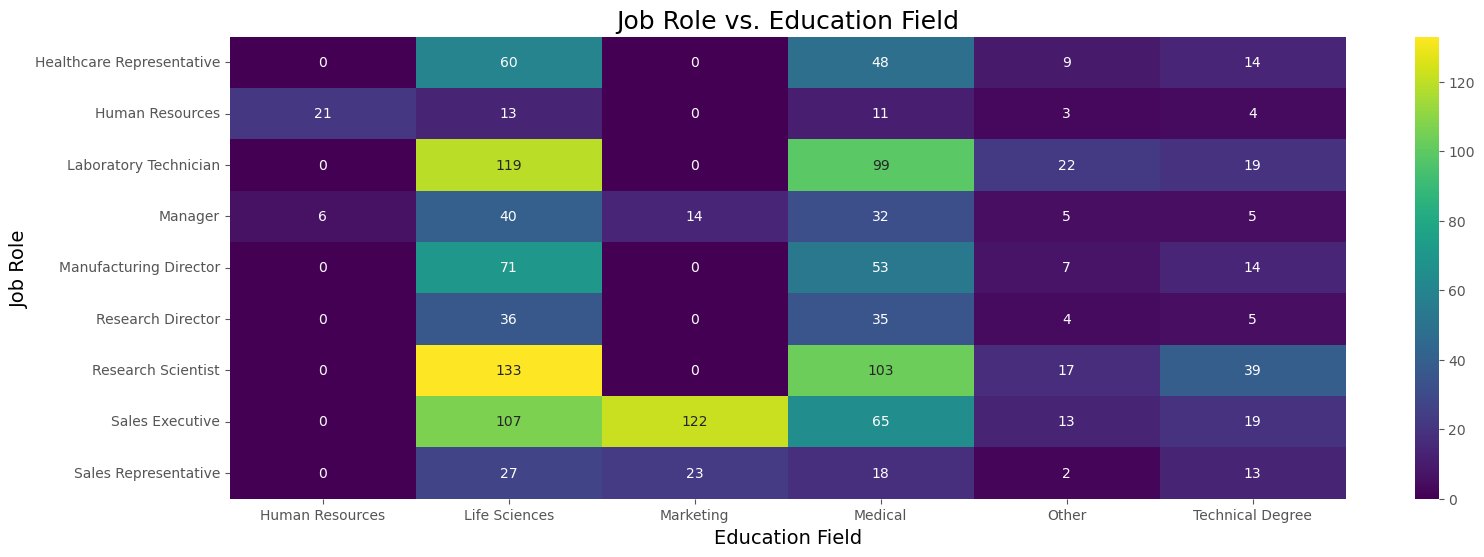

In [58]:
#Create a cross tabulation table to explore any correlations between education field and job role.

#Create a cross tabulation
cross_tab = pd.crosstab(df['Job_Role'], df['Education_Field'])

plt.figure(figsize = (18,6))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d',cbar=True)

#Add chart Title and axis labels
plt.title('Job Role vs. Education Field', fontsize=18)
plt.xlabel('Education Field', fontsize=14)
plt.ylabel('Job Role', fontsize=14)

plt.show()

In [59]:
#Employees who studied human resources only work in human resources or management.
#Employees who studied life sciences work in all departments, but most commonly as a research scientist or lab tech.
#Employees who studied marketing primarily work as a sales executive, but some work as a manager or sales representative.
#Employees who studied medical work in all departments, but most commpnly as a research scientist or lab tech.
#Employees who listed other work across all departments, with the highest number reported as labratory tech.
#Employees who have a technical degree work across all departments, with the highest reported as research scientist.

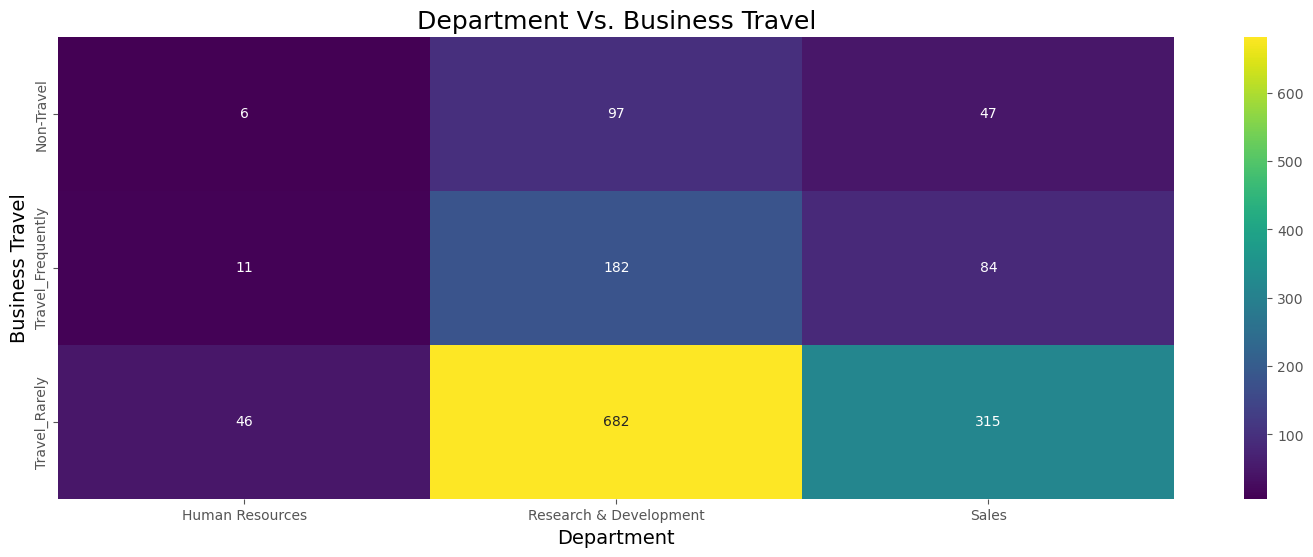

In [61]:
#Create a cross tabulation table to explore which departments travel the most for work

#Create a cross tabulation
cross_tab = pd.crosstab(df['Business_Travel'], df['Department'])

plt.figure(figsize = (18,6))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d',cbar=True)

#Add chart Title and axis labels
plt.title('Department Vs. Business Travel', fontsize=18)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Business Travel', fontsize=14)

plt.show()

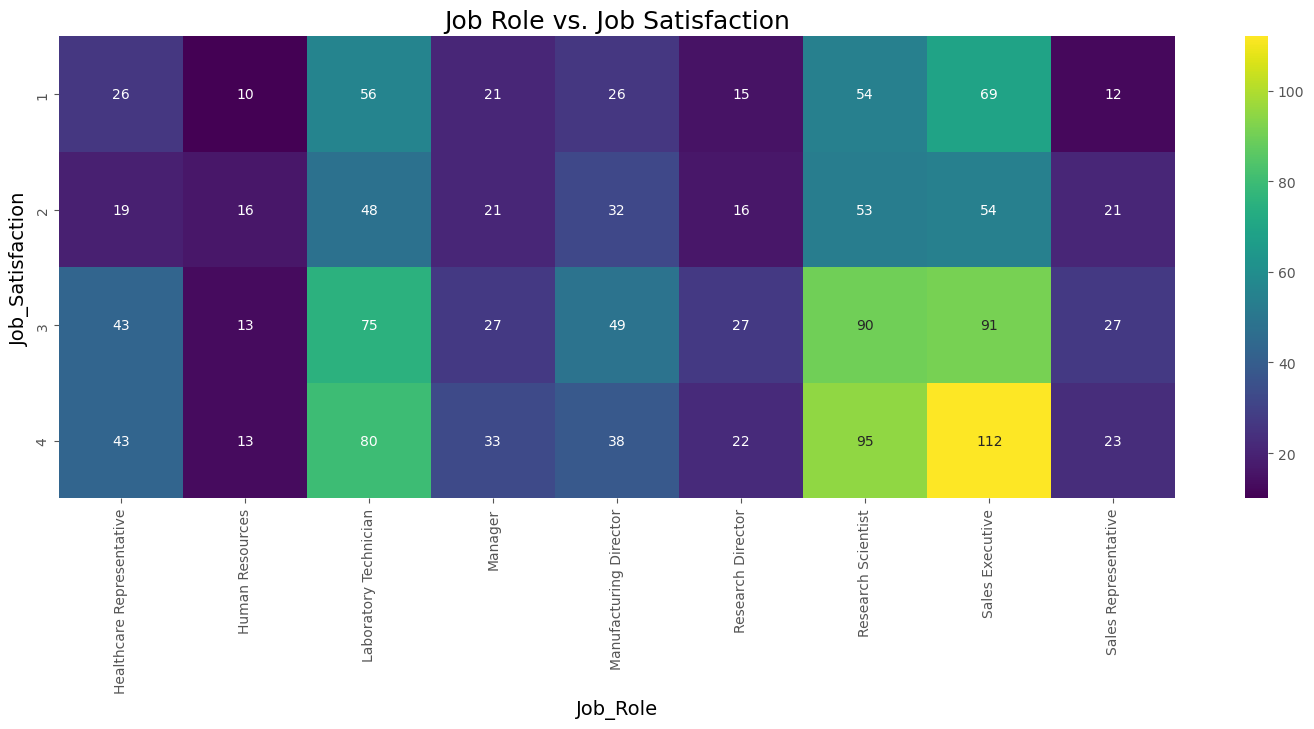

In [62]:
#Create a cross tabulation table to explore which job roles have the highest and lowest satisfaction rates.

#Create a cross tabulation
cross_tab = pd.crosstab(df['Job_Satisfaction'], df['Job_Role'])

plt.figure(figsize = (18,6))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d',cbar=True)

#Add chart Title and axis labels
plt.title('Job Role vs. Job Satisfaction', fontsize=18)
plt.xlabel('Job_Role', fontsize=14)
plt.ylabel('Job_Satisfaction', fontsize=14)

plt.show()

In [63]:
#Healthcare Representatives: Job satisfaction most commonly rated 3 or 4.
#Human Resources: Job satisfaction most commonly rated 2.
#Labratory Technician: Job satisfaction most commonly rated 4.
#Manager: Job satisfaction most commonly rated 4.
#Manufacturing Director: Job satisfaction most commonly rated 3.
#Research Director: Job satisfaction most commonly rated 3.
#Research Scientist: Job satisfaction most commonly rated 4.
#Sales Executive: Job satisfaction most commonly rated 4.
#Sales Representative: Job satisfaction most commonly rated 3.

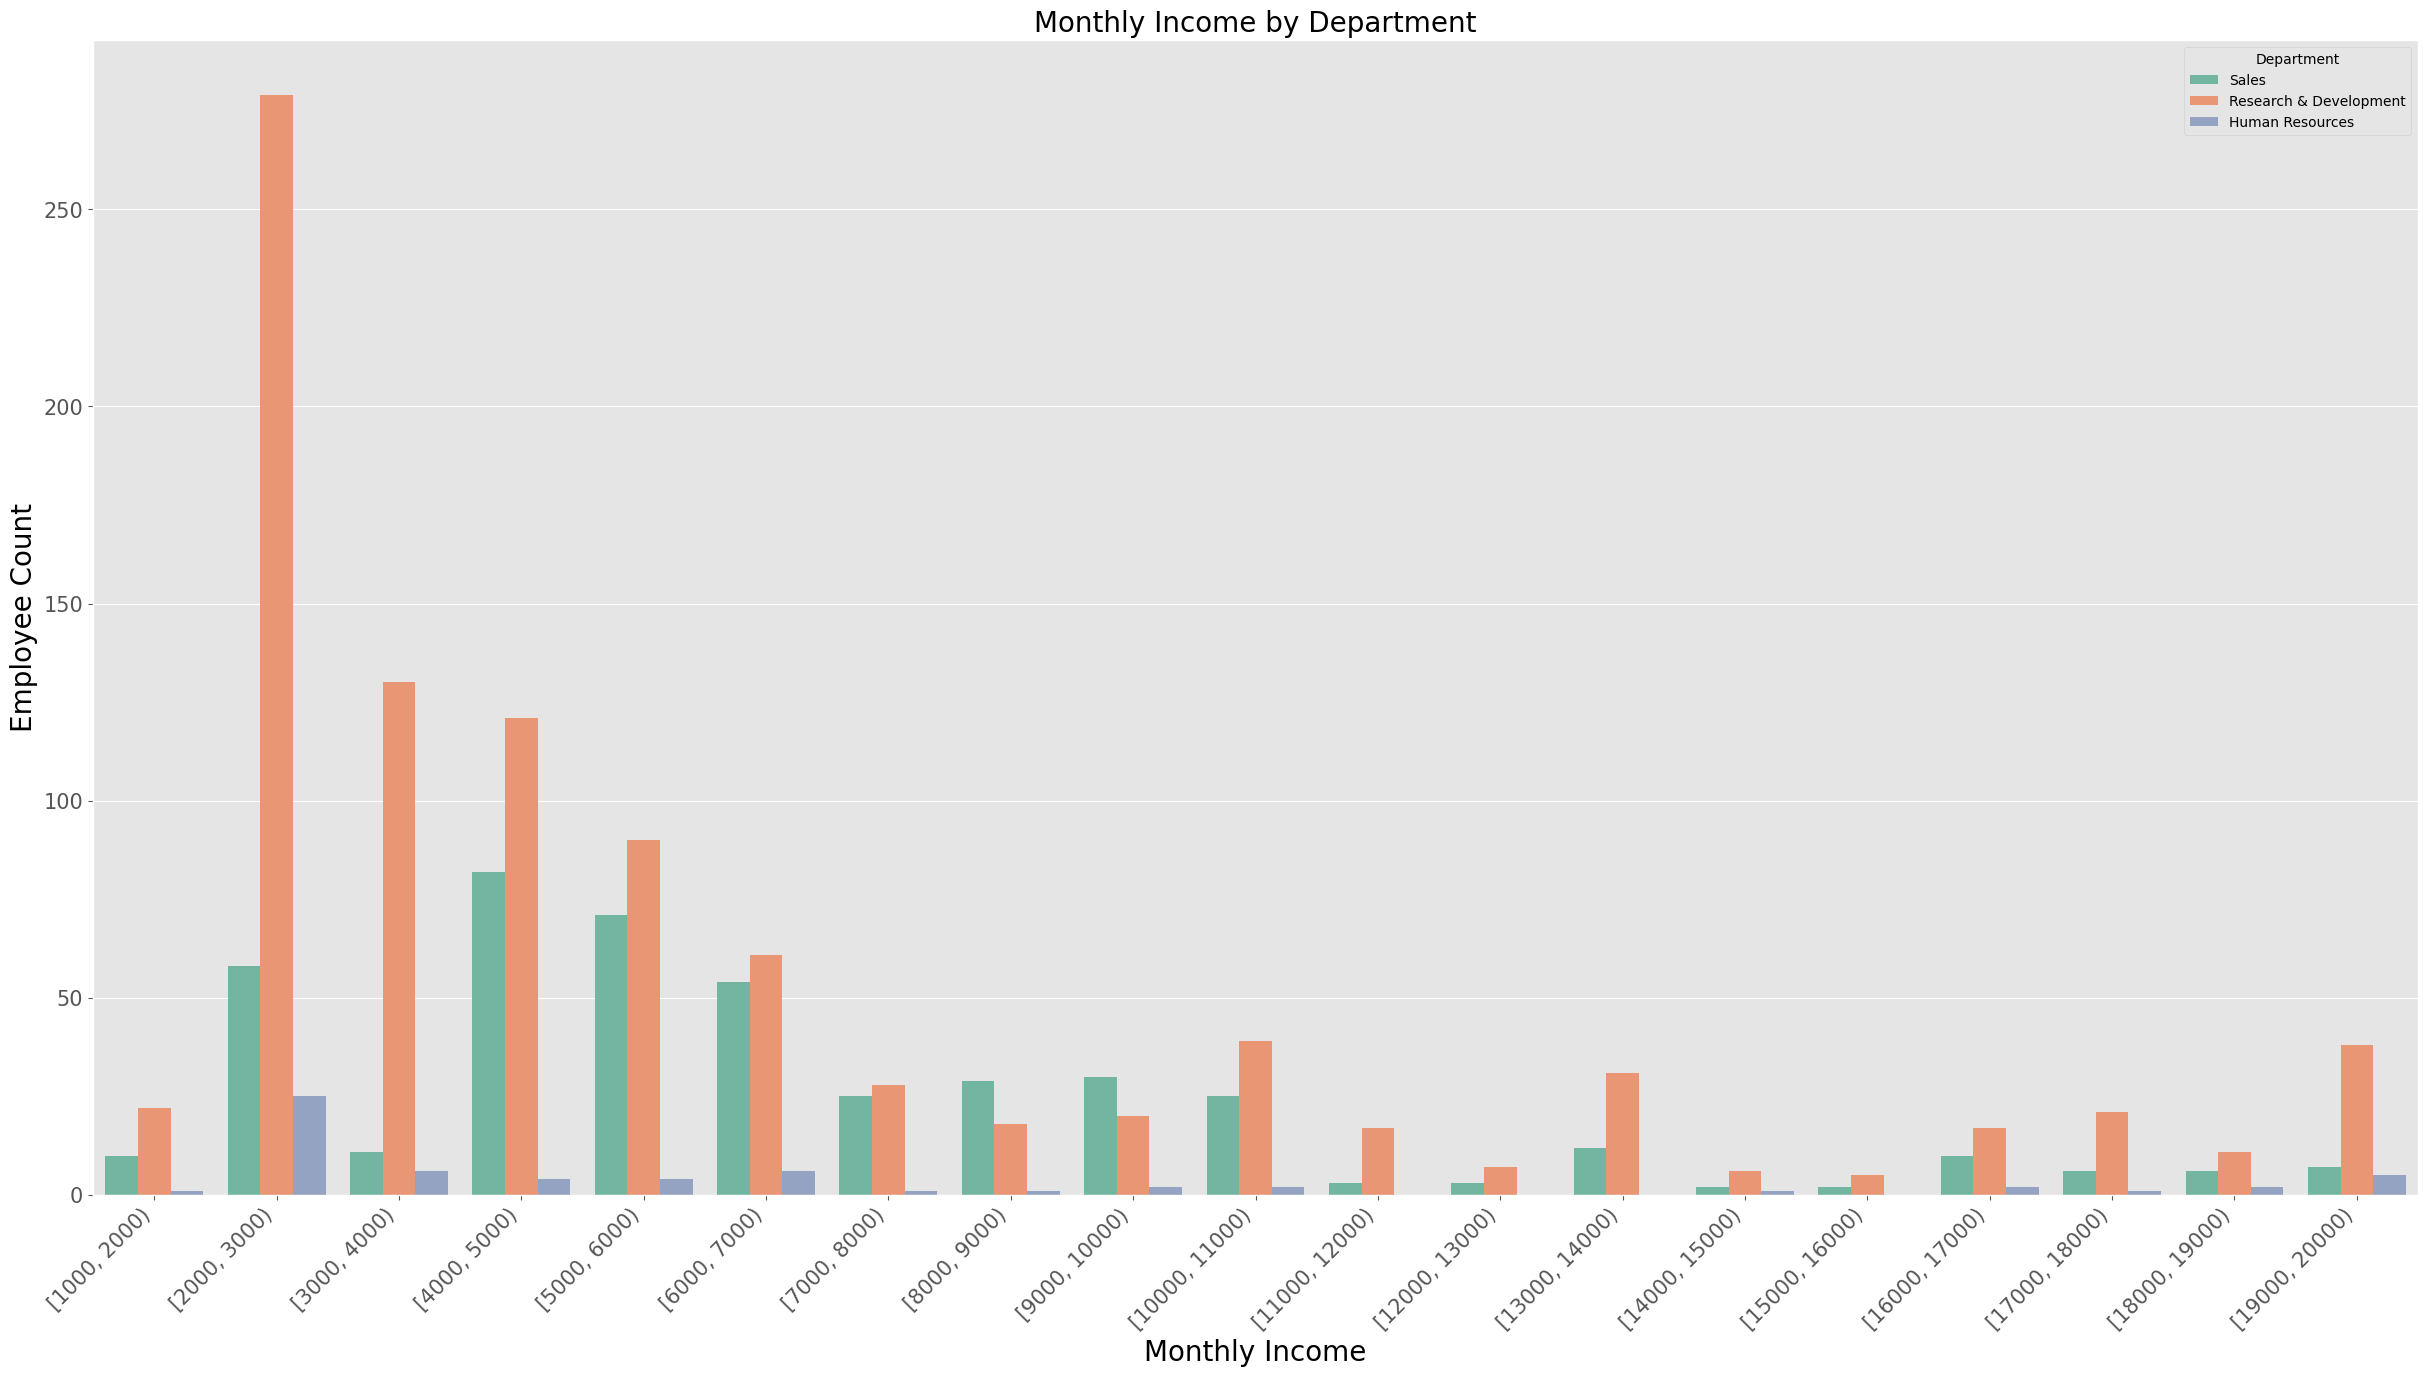

In [67]:
#Create a chart displaying the monthly income by department

#Create bins for monthly income
bins = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]

#Use pd.cut to bin the monthly income data
df['Monthly_Income_Bin'] = pd.cut(df['Monthly_Income'], bins=bins, right=False)

#Plot the chart
plt.figure(figsize=(30,15))
sns.countplot(x='Monthly_Income_Bin', hue='Department', data=df, palette='Set2')

#Add chart title & axis-labels
plt.title('Monthly Income by Department', fontsize=20)
plt.xlabel('Monthly Income', fontsize=20)
plt.ylabel('Employee Count', fontsize=20)

#Rotate x-axis labels to improve readability
plt.xticks(rotation=45, ha='right')

#Increase label font size to improve readability
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.show()